In [1]:
# ================================================================
# ✅ Texture Feature Extraction (Gabor + GLCM) + Auto Save & Download
# ================================================================

# 1️⃣ Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from skimage.feature import graycomatrix, graycoprops
import zipfile
import os

In [2]:
# 2️⃣ Upload an image
print("📤 Please upload your image (JPG/PNG):")
uploaded = files.upload()
image_filename = next(iter(uploaded))  # get the uploaded file name

📤 Please upload your image (JPG/PNG):


Saving burned_2.jpeg to burned_2.jpeg


In [3]:
# 3️⃣ Load image in grayscale
img = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError(f"❌ Could not load image from {image_filename}")

# Resize for consistent processing
img = cv2.resize(img, (200, 200))

In [4]:
# 4️⃣ Prepare output directory
output_dir = "texture_features_outputs"
os.makedirs(output_dir, exist_ok=True)


--- Gabor Filter Texture Extraction ---


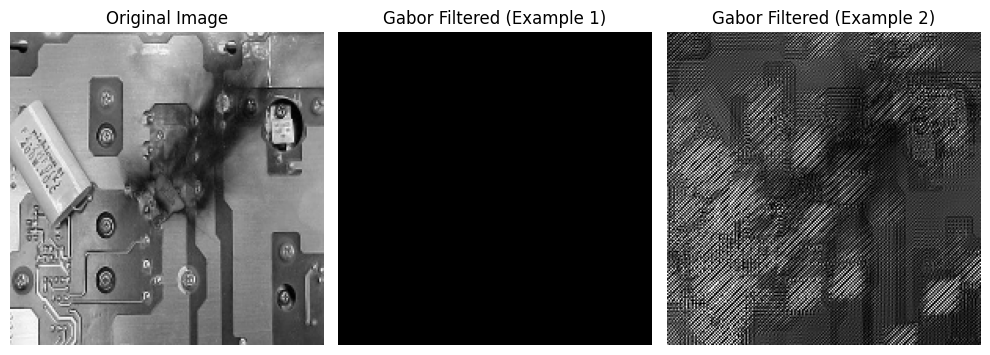

Extracted Gabor features (mean intensity): [np.float64(255.0), np.float64(255.0), np.float64(255.0), np.float64(233.407125), np.float64(65.2624), np.float64(74.040125), np.float64(255.0), np.float64(255.0), np.float64(255.0), np.float64(233.256025), np.float64(61.771525), np.float64(74.54415)]


In [5]:
# ------------------------------------------------------------
# 🔹 Method 1: Gabor Filter Texture Extraction
# ------------------------------------------------------------
print("\n--- Gabor Filter Texture Extraction ---")
gabor_filters = []
for theta in np.arange(0, np.pi, np.pi / 4):  # 4 orientations
    for freq in [0.1, 0.5, 1.0]:  # 3 frequencies
        kernel = cv2.getGaborKernel((21, 21), 8.0, theta, freq, 0.5, 0, ktype=cv2.CV_32F)
        gabor_filters.append(kernel)

gabor_features = []
gabor_images = []
for i, kernel in enumerate(gabor_filters):
    filtered_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
    gabor_images.append(filtered_img)
    gabor_features.append(filtered_img.mean())  # example feature: mean intensity

# Save sample filtered images
cv2.imwrite(f"{output_dir}/gabor_filtered_1.png", gabor_images[0])
cv2.imwrite(f"{output_dir}/gabor_filtered_2.png", gabor_images[4])

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gabor_images[0], cmap='gray')
plt.title('Gabor Filtered (Example 1)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gabor_images[4], cmap='gray')
plt.title('Gabor Filtered (Example 2)')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Extracted Gabor features (mean intensity): {gabor_features}")

In [8]:
# ------------------------------------------------------------
# 🔹 Method 2: GLCM Texture Properties
# ------------------------------------------------------------
print("\n--- GLCM Texture Extraction ---")
glcm = graycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

contrast = graycoprops(glcm, 'contrast')[0, 0]
dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]

# Save texture features to a text file
features_text = (
    f"--- Gabor Filter Features ---\n"
    f"Mean Intensities: {gabor_features}\n\n"
    f"--- GLCM Texture Features ---\n"
    f"Contrast: {contrast}\n"
    f"Dissimilarity: {dissimilarity}\n"
    f"Homogeneity: {homogeneity}\n"
    f"Energy: {energy}\n"
    f"Correlation: {correlation}\n"
)

features_path = os.path.join(output_dir, "texture_features.txt")
with open(features_path, "w") as f:
    f.write(features_text)

print(features_text)


--- GLCM Texture Extraction ---
--- Gabor Filter Features ---
Mean Intensities: [np.float64(255.0), np.float64(255.0), np.float64(255.0), np.float64(233.407125), np.float64(65.2624), np.float64(74.040125), np.float64(255.0), np.float64(255.0), np.float64(255.0), np.float64(233.256025), np.float64(61.771525), np.float64(74.54415)]

--- GLCM Texture Features ---
Contrast: 764.0332914572864
Dissimilarity: 13.4814824120603
Homogeneity: 0.165974108965668
Energy: 0.015283818607748679
Correlation: 0.8491846248932018



In [9]:
# Save grayscale original
cv2.imwrite(f"{output_dir}/original_grayscale.png", img)

# Zip and download everything
zip_filename = "texture_features_results.zip"
with zipfile.ZipFile(zip_filename, "w") as zipf:
    for root, _, files_in_dir in os.walk(output_dir):
        for file in files_in_dir:
            zipf.write(os.path.join(root, file))

files.download(zip_filename)
print(f"✅ All results saved and downloaded as: {zip_filename}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ All results saved and downloaded as: texture_features_results.zip
